In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# Descripción de los Datos
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)

# Importar Datos

In [19]:
data = pd.read_csv('./data_identificada.csv')

### Agrupación
Agrupación de las variables cuantitativas y categóricas por separado.

In [21]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Inspección Datos

### Variables Cuantitativas con respecto a la variable objetivo

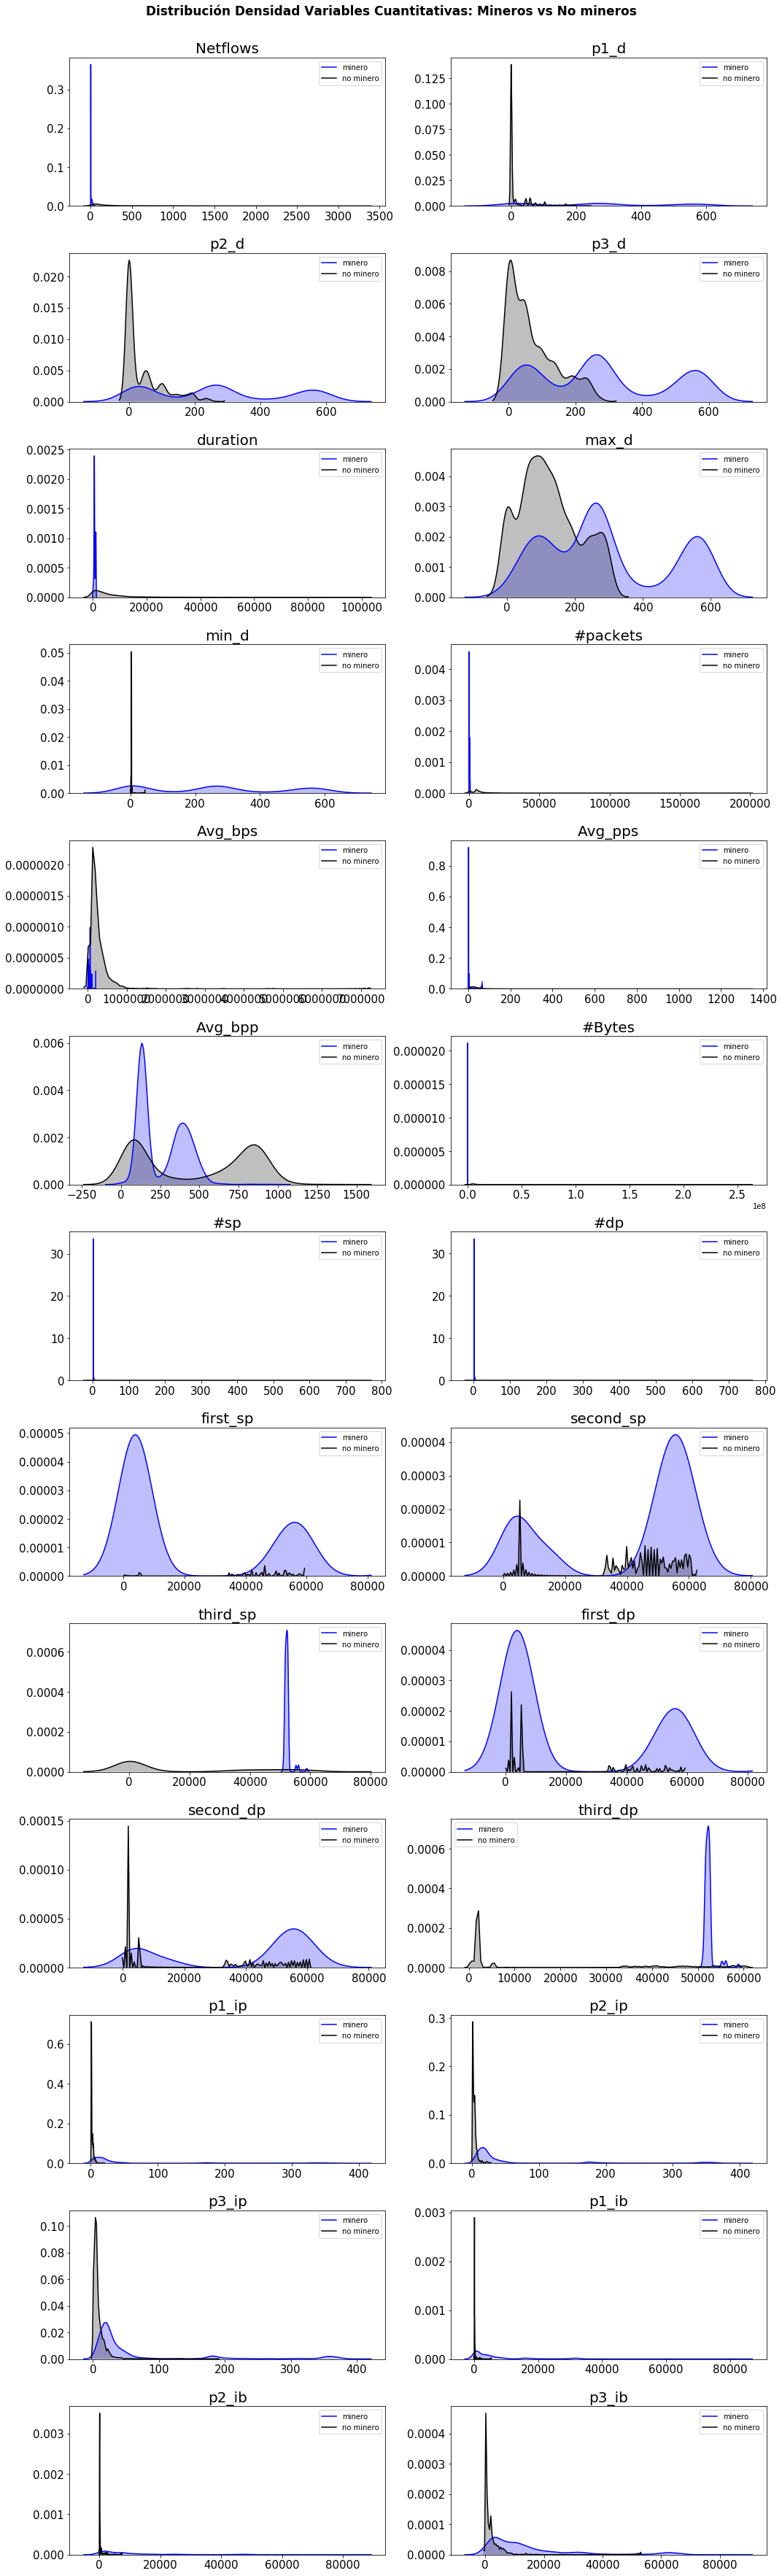

In [22]:
fig, ax = plt.subplots(nrows = 13, ncols = 2, figsize = (15,50))
ax = ax.flat

for i, col in enumerate(data_numeric):
    sns.kdeplot(data[data['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i], label="minero")
    sns.kdeplot(data[data['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i], label="no minero")    
    ax[i].set_title(col, size = 20)
    ax[i].tick_params(labelsize = 15)
    ax[i].set_xlabel("", size=15)
    ax[i].legend()

fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Mineros vs No mineros', fontsize = 17, fontweight = "bold");

In [ ]:
sns.pairplot(data_n, hue='Type')